<b>Objectif :</b>

En utilisant le dataset `synthetic_housing_dataset.csv`, vous allez préparer un modèle de prediction de prix d'appartement étant données ses caractéristiques

<b>Directives :</b>

Veuillez suivre les étapes de `CRISP-DM` pour dévéloper le modèle.

Ce notebook vise à analyser un dataset synthétique contenant des informations sur les biens immobiliers.

## Compréhension des données

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np


In [2]:
data_path = 'synthetic_housing_dataset.csv'
df = pd.read_csv(data_path)
df.head()

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,city,price
0,10000.000000,2.789029,2.569210,4.148195,5.793163,1244.341795,1988-01-01,Paris,629535.486411
1,0.000000,2.651413,2.156254,2.734071,2.485035,-558.753511,2014-01-01,Lyon,682734.110117
2,-50.000000,3.476331,2.822102,0.563755,1.140312,230.558272,1998-01-01,Lyon,705054.855203
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,1962-01-01,Marseille,550261.271344
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,1991-01-01,Toulouse,510619.235213


Diviser les données en entrée (features X) et sortie (cible y)

In [3]:
X = df.drop('price', axis=1)  
y = df['price'] 

Diviser les données en train et test (X_train, X_test, y_train, y_test)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Vérifier les types des colonnes

In [5]:
df.dtypes


size_m2                    float64
num_bedrooms               float64
num_bathrooms              float64
distance_school            float64
public_transport_access    float64
property_tax               float64
date_built                  object
city                        object
price                      float64
dtype: object

In [6]:
df.describe()

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,price
count,100.000000,95.000000,100.000000,100.000000,97.000000,100.000000,100.000000
mean,239.304605,2.911012,2.081660,4.712559,4.637516,955.294858,552958.490913
std,987.255056,0.955481,0.722163,2.897322,3.066544,803.084281,145741.541880
min,-50.000000,0.518600,0.075309,0.145447,-0.199299,-963.865284,126877.612975
25%,117.346484,2.345428,1.613437,2.028225,2.278455,469.459761,471887.796953
50%,139.866728,2.791213,2.111695,4.599573,4.546566,922.619185,556742.850477
75%,168.257576,3.438545,2.543021,6.938161,6.943386,1482.927155,648621.375838
max,10000.000000,5.522306,3.652681,9.997177,11.227652,3024.877889,910713.536337


Analyse des valeurs manquantes

In [7]:
# Afficher le nombre de valeurs manquantes pour chaque colonne
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


num_bedrooms               5
public_transport_access    3
dtype: int64


Analyse des valeurs aberantes (outliers)

In [8]:
Q1 = df['size_m2'].quantile(0.25)
Q3 = df['size_m2'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['size_m2'] < lower_bound) | (df['size_m2'] > upper_bound)]
print(f"Nombre de valeurs aberrantes dans 'size_m2' : {len(outliers)}")
outliers


Nombre de valeurs aberrantes dans 'size_m2' : 4


,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,city,price
0,10000.000000,2.789029,2.569210,4.148195,5.793163,1244.341795,1988-01-01,Paris,629535.486411
1,0.000000,2.651413,2.156254,2.734071,2.485035,-558.753511,2014-01-01,Lyon,682734.110117
2,-50.000000,3.476331,2.822102,0.563755,1.140312,230.558272,1998-01-01,Lyon,705054.855203
74,19.012745,0.518600,0.075309,1.689351,2.060497,222.402861,1960-01-01,Lyon,126877.612975


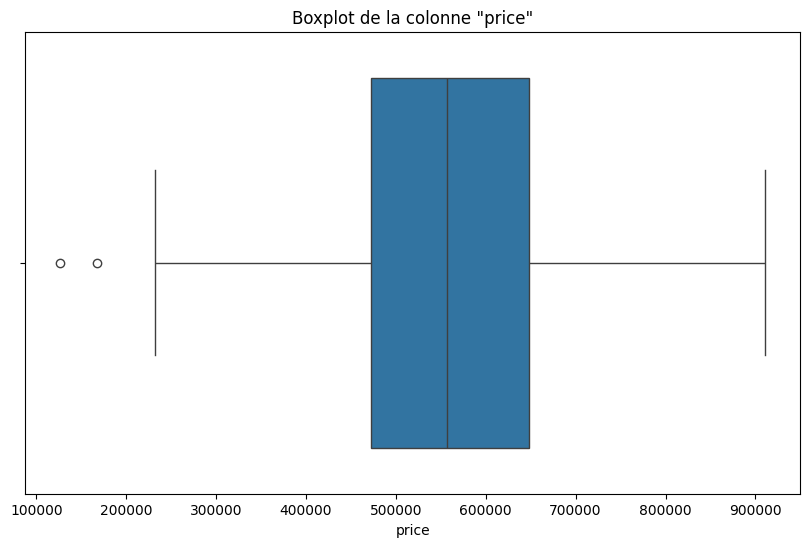

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot de la colonne "price"')
plt.show()


## Préparation des données

Nettoyage des données

In [12]:
# Imputation des valeurs manquantes
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


C:\Users\elies\AppData\Local\Temp\ipykernel_16668\3994240044.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\elies\AppData\Local\Temp\ipykernel_16668\3994240044.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [13]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    
    # Remplacer les valeurs en dehors de [lower_bound, upper_bound] par la médiane
    df.loc[df[column] < lower_bound, column] = median
    df.loc[df[column] > upper_bound, column] = median



Transformation des données

In [14]:
encoder = OneHotEncoder(sparse_output=False)
city_encoded = encoder.fit_transform(df[['city']])

city_encoded_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['city']))

df = pd.concat([df.drop('city', axis=1), city_encoded_df], axis=1)
df


,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,price,city_Lyon,city_Marseille,city_Paris,city_Toulouse
0,139.866728,2.789029,2.569210,4.148195,5.793163,1244.341795,1988-01-01,629535.486411,0.0,0.0,1.0,0.0
1,139.866728,2.651413,2.156254,2.734071,2.485035,-558.753511,2014-01-01,682734.110117,1.0,0.0,0.0,0.0
2,139.866728,3.476331,2.822102,0.563755,1.140312,230.558272,1998-01-01,705054.855203,1.0,0.0,0.0,0.0
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,1962-01-01,550261.271344,0.0,1.0,0.0,0.0
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,1991-01-01,510619.235213,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,76.824253,1.729144,0.958907,2.093493,1.741980,964.452073,2011-01-01,483227.688792,0.0,0.0,0.0,1.0
96,164.806014,2.854192,2.534292,3.704721,3.723139,1363.986802,2017-01-01,691165.585527,0.0,1.0,0.0,0.0
97,163.052764,3.337918,2.390785,4.845230,6.521667,-67.649146,1981-01-01,539688.433742,0.0,0.0,0.0,1.0
98,150.255673,3.034218,2.309082,6.182548,6.509475,1065.165746,2003-01-01,645035.383203,1.0,0.0,0.0,0.0


In [15]:
df['date_built'] = pd.to_datetime(df['date_built'], errors='coerce')

min_date = df['date_built'].min()

df['month_build'] = df['date_built'].apply(lambda x: (x.year - min_date.year) * 12 + (x.month - min_date.month))


In [16]:
df = df.drop('date_built', axis=1)

In [17]:
# Normaliser les données (en utilinsat STandardScaler)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('price', errors='ignore') 

scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,price,city_Lyon,city_Marseille,city_Paris,city_Toulouse,month_build
0,-0.123851,-0.145689,0.677406,-0.195770,0.384627,0.401898,629535.486411,-0.701810,-0.468521,1.564697,-0.5,-0.078915
1,-0.123851,-0.316391,0.078631,-0.686308,-0.716398,-1.935193,682734.110117,1.424887,-0.468521,-0.639101,-0.5,1.355897
2,-0.123851,0.706859,1.044091,-1.439159,-1.163955,-0.912122,705054.855203,1.424887,-0.468521,-0.639101,-0.5,0.472936
3,1.876447,1.507629,1.942193,1.364877,1.438120,1.530247,550261.271344,-0.701810,2.134375,-0.639101,-0.5,-1.513726
4,-0.160349,-0.274476,-0.582820,1.185116,2.186781,-0.061909,510619.235213,-0.701810,-0.468521,-0.639101,2.0,0.086641


Optimisation des données

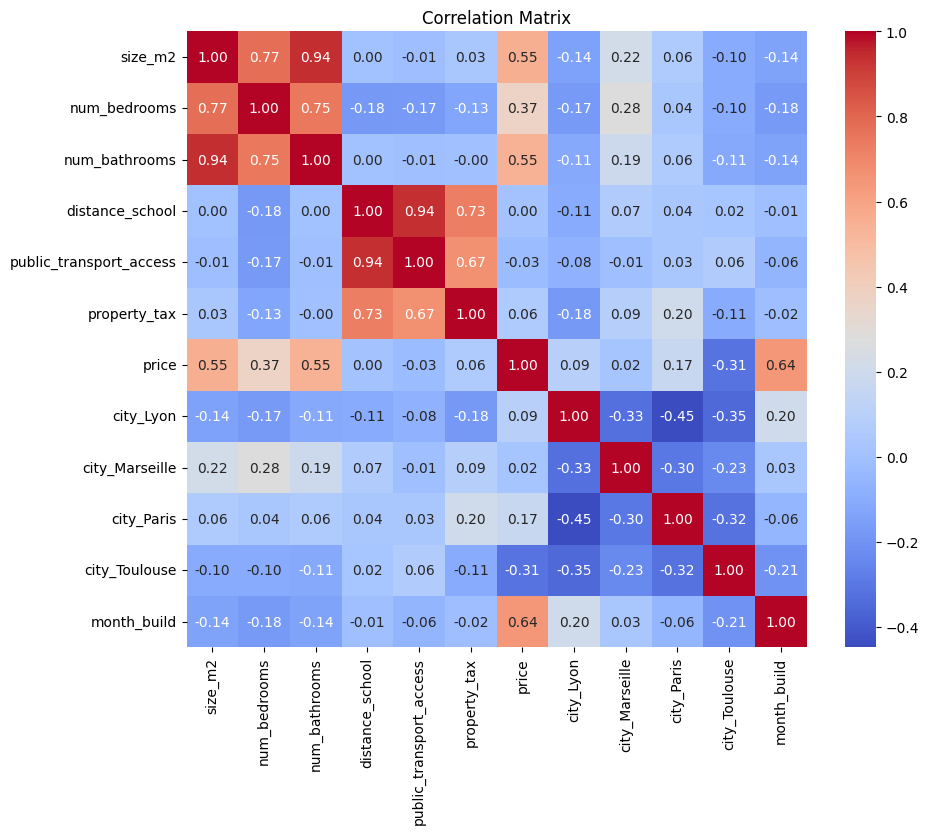

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [19]:
correlation_matrix = df.corr()
target_correlation_threshold = 0.1
high_correlation_features = correlation_matrix[
    (correlation_matrix['price'].abs() > target_correlation_threshold) & (correlation_matrix.index != 'price')
].index

df_high_correlation = df[high_correlation_features.union(['price'])]

df_high_correlation.head()

,city_Paris,city_Toulouse,month_build,num_bathrooms,num_bedrooms,price,size_m2
0,1.564697,-0.5,-0.078915,0.677406,-0.145689,629535.486411,-0.123851
1,-0.639101,-0.5,1.355897,0.078631,-0.316391,682734.110117,-0.123851
2,-0.639101,-0.5,0.472936,1.044091,0.706859,705054.855203,-0.123851
3,-0.639101,-0.5,-1.513726,1.942193,1.507629,550261.271344,1.876447
4,-0.639101,2.0,0.086641,-0.582820,-0.274476,510619.235213,-0.160349


In [20]:
df_high_correlation.head()

,city_Paris,city_Toulouse,month_build,num_bathrooms,num_bedrooms,price,size_m2
0,1.564697,-0.5,-0.078915,0.677406,-0.145689,629535.486411,-0.123851
1,-0.639101,-0.5,1.355897,0.078631,-0.316391,682734.110117,-0.123851
2,-0.639101,-0.5,0.472936,1.044091,0.706859,705054.855203,-0.123851
3,-0.639101,-0.5,-1.513726,1.942193,1.507629,550261.271344,1.876447
4,-0.639101,2.0,0.086641,-0.582820,-0.274476,510619.235213,-0.160349


In [21]:
# Réduire les features en utilinsat ACP
# Garder uniquement les 2 features les plus influentes en inertie
imputer = SimpleImputer(strategy='mean')
X = df_high_correlation.drop('price', axis=1)
X_imputed = imputer.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['price'] = df_high_correlation['price'].values 

df_pca.head()


,PC1,PC2,price
0,0.417940,-1.228292,629535.486411
1,-0.383129,-0.521067,682734.110117
2,0.850530,-0.108266,705054.855203
3,3.246024,0.779457,550261.271344
4,-0.843685,1.739079,510619.235213


## Modeling

In [22]:
# Entrainer la Regression Linéaire avec les données de train
X = df_pca[['PC1', 'PC2']]
y = df_pca['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Evaluation

Prédire les sorties des données de train et de test avec le modèle entrainé

In [23]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Evaluer la performance du modèle

In [24]:
# Calculer MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", mse_train)
print("Test MSE:", mse_test)


Training MSE: 9805509274.892164
Test MSE: 11513609252.156502


In [25]:
# Calculer R2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training R2:", r2_train)
print("Test R2:", r2_test)


Training R2: 0.4409306080338603
Test R2: 0.36383437048757805


## Déploiement

Utiliser le modèle évalué pour prédire le prix d'un apprtement quelconque

In [48]:
new_apartment_features = np.array([[1.5, -0.5]])

# Utiliser le modèle pour faire une prédiction
predicted_price = model.predict(new_apartment_features)

print("Le prix prédit pour l'appartement est:", predicted_price[0])

Le prix prédit pour l'appartement est: 646736.1602864728


c:\Users\elies\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
